#Desafío TelecomX - 2

##Preparación de los datos

###Cargando los datos extraídos del desafío TelecomX - 1

In [331]:
import pandas as pd

In [332]:
datos = pd.read_csv('/content/datos_tratados.csv')

###Eliminación de Columnas Irrelevantes

In [333]:
#Primero revisar los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7032 non-null   object 
 1   Churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   int64  
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   int64  
 11  online_backup      7032 non-null   int64  
 12  device_protection  7032 non-null   int64  
 13  tech_support       7032 non-null   int64  
 14  streaming_tv       7032 non-null   int64  
 15  streaming_movies   7032 non-null   int64  
 16  contract           7032 

In [334]:
#Eliminar columnas no relevantes
datos = datos.drop(['customerID', 'cuentas_diarias'], axis=1)

###Encoding

In [335]:
#Reemplazando datos con 2 opciones
datos['gender'] = datos['gender'].replace({'Female': 0, 'Male': 1})

/tmp/ipython-input-609166614.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [336]:
#Codificando variables con más de 2 opciones
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

columnas = datos.columns

one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                   ['internet_service','contract','payment_method']),
                                  remainder='passthrough', sparse_threshold=0,
                                  force_int_remainder_cols=False)

datos_codificados = one_hot.fit_transform(datos)

In [337]:
#Extrayendo los nombres de las columnas
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__internet_service_DSL',
       'onehotencoder__internet_service_Fiber optic',
       'onehotencoder__internet_service_No',
       'onehotencoder__contract_Month-to-month',
       'onehotencoder__contract_One year',
       'onehotencoder__contract_Two year',
       'onehotencoder__payment_method_Bank transfer automatic',
       'onehotencoder__payment_method_Credit card automatic',
       'onehotencoder__payment_method_Electronic check',
       'onehotencoder__payment_method_Mailed check', 'remainder__Churn',
       'remainder__gender', 'remainder__senior_citizen',
       'remainder__partner', 'remainder__dependents', 'remainder__tenure',
       'remainder__phone_service', 'remainder__multiple_lines',
       'remainder__online_security', 'remainder__online_backup',
       'remainder__device_protection', 'remainder__tech_support',
       'remainder__streaming_tv', 'remainder__streaming_movies',
       'remainder__paperless_billing', 'remainder__monthly_charges',
   

In [338]:
#Pasando los datos a un nuevo DF
datos_cod = pd.DataFrame(datos_codificados, columns=one_hot.get_feature_names_out(columnas))

In [339]:
datos_cod

,onehotencoder__internet_service_DSL,onehotencoder__internet_service_Fiber optic,onehotencoder__internet_service_No,onehotencoder__contract_Month-to-month,onehotencoder__contract_One year,onehotencoder__contract_Two year,onehotencoder__payment_method_Bank transfer automatic,onehotencoder__payment_method_Credit card automatic,onehotencoder__payment_method_Electronic check,onehotencoder__payment_method_Mailed check,...,remainder__multiple_lines,remainder__online_security,remainder__online_backup,remainder__device_protection,remainder__tech_support,remainder__streaming_tv,remainder__streaming_movies,remainder__paperless_billing,remainder__monthly_charges,remainder__total_charges
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90
7028,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70
7029,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75
7030,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65


###Verificación de la proporción de Cancelación

In [341]:
datos_cod['remainder__Churn'].value_counts(normalize=True)

,proportion
remainder__Churn,
0.0,0.734215
1.0,0.265785


###Balanceo de datos con SMOTE

In [342]:
#Separar las variables
X = datos_cod.drop(['remainder__Churn'], axis=1)
y = datos_cod['remainder__Churn']

In [343]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE()
X_balanceada, y_balanceada = oversampling.fit_resample(X, y)

y_balanceada.value_counts(normalize=True)

,proportion
remainder__Churn,
0.0,0.5
1.0,0.5


###Normalizando datos

In [344]:
#Solo normalizo 'X', porque 'y' está en escala de 0 a 1
from sklearn.preprocessing import MinMaxScaler

normalizacion = MinMaxScaler()
X_normalizado = normalizacion.fit_transform(X_balanceada)

pd.DataFrame(X_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.471144,0.066294
1,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.414428,0.060420
2,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.553731,0.030239
3,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.793532,0.140670
4,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.653234,0.028687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.238047,0.000000,0.238047,0.238047,1.000000,0.269791,0.008459
10322,0.000000,1.000000,0.0,0.412964,0.587036,0.000000,0.000000,0.412964,0.587036,0.0,...,1.000000,0.000000,0.000000,0.412964,0.587036,0.587036,0.587036,0.587036,0.731251,0.485284
10323,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.607824,0.006985
10324,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.983224,0.000000,0.016776,0.0,...,0.016776,0.983224,0.000000,0.983224,0.983224,0.000000,1.000000,1.000000,0.756301,0.042500


##Correlación y Selección de variables

###Análisis de correlación

In [345]:
corr = datos_cod.corr()

In [404]:
#Correlación de todas las variables con Churn
corr['remainder__Churn'].abs().sort_values(ascending=False)

,remainder__Churn
remainder__Churn,1.000000
onehotencoder__contract_Month-to-month,0.404565
remainder__tenure,0.354049
onehotencoder__internet_service_Fiber optic,0.307463
onehotencoder__contract_Two year,0.301552
onehotencoder__payment_method_Electronic check,0.301455
onehotencoder__internet_service_No,0.227578
remainder__total_charges,0.199484
remainder__monthly_charges,0.192858
remainder__paperless_billing,0.191454


In [347]:
#Correlación de las variables numéricas con Churn
variables_numericas = ['remainder__tenure', 'remainder__monthly_charges', 'remainder__total_charges']

corr_numericas = datos_cod[variables_numericas + ['remainder__Churn']].corr()
corr_numericas['remainder__Churn'].sort_values(ascending=False)

,remainder__Churn
remainder__Churn,1.000000
remainder__monthly_charges,0.192858
remainder__total_charges,-0.199484
remainder__tenure,-0.354049


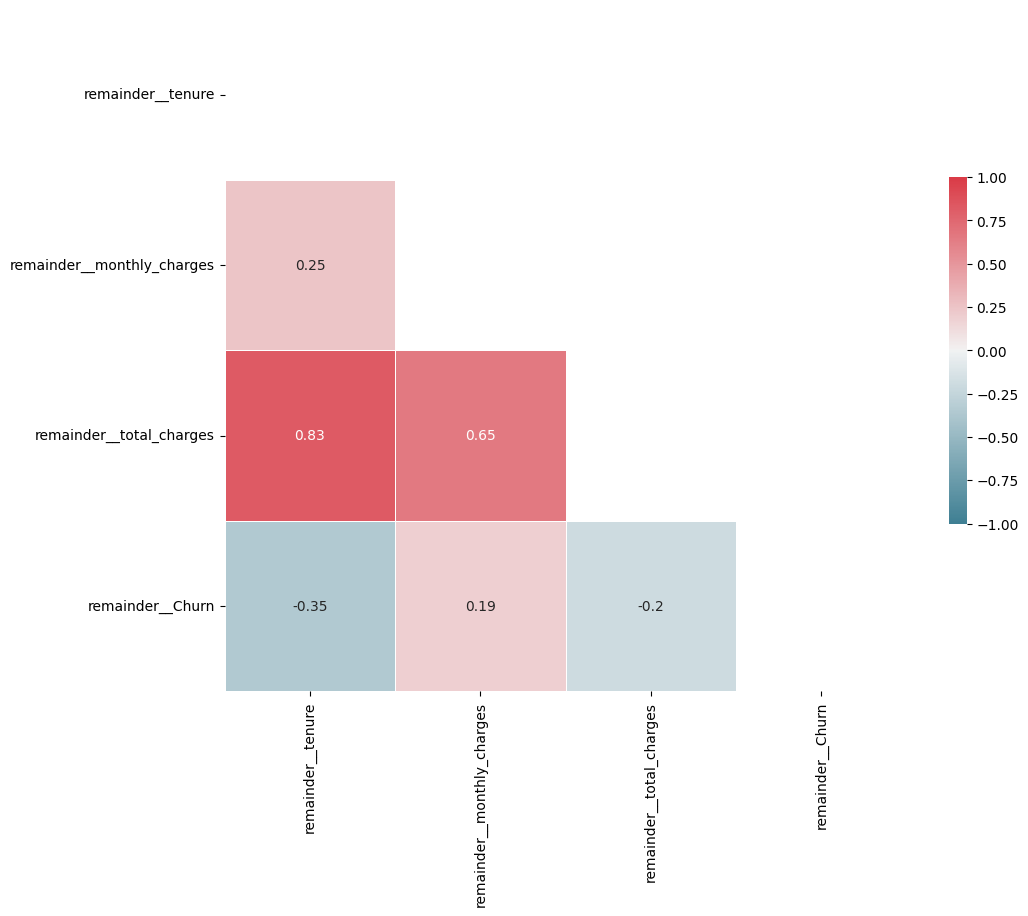

In [348]:
#Visualizando la correlación de Churn con las variables numéricas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mascara = np.zeros_like(corr_numericas, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_numericas, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

plt.show()

En este caso vemos una fuerte correlación positiva entre los cargos totales y el tiempo de permanencia, y también entre los cargos totales y los cargos mensuales. En el primer caso es evidente que mientras más tiempo está un cliente en la compañía, más dinero ha gastado en ese tiempo de permanencia. Esto nos podría indicar que quizás la información que nos ofrece cargos totales puede ser redundante y podríamos considerar eliminar esa variable.

###Análisis dirigido

In [349]:
#Boxplot de Tiempo de contrato vs Cancelación
import plotly.express as px

In [386]:
fig = px.box(datos_cod, x='remainder__tenure', color='remainder__Churn')

fig.update_layout(
    width=1050,
    height=600,
    title_text="Tiempo de Contrato según Estado de Cancelación",
    title_x=0.5,
    xaxis_title="Tiempo de Contrato (meses)",
    yaxis_title="Cancelación",
    legend_title="Cancelación"
)


new_names = {'0.0': 'Permanece', '1.0': 'Cancela suscripción'}
fig.for_each_trace(lambda t: t.update(name = new_names[t.name]))

fig.show()

En este gráfico podemos observar que aquellos clientes que permanecen en la compañía tienen una mediana de 38 meses y que el 75% de aquellos que se van lo hacen con una permanencia de hasta 29 meses.

In [387]:
#Boxplot de Gasto Total x Cancelación
fig = px.box(datos_cod, x='remainder__total_charges', color='remainder__Churn')

fig.update_layout(
    width=1050,
    height=600,
    title_text="Cargos totales según Estado de Cancelación",
    title_x=0.5,
    xaxis_title="Gasto total",
    yaxis_title="Cancelación",
    legend_title="Cancelación"
)


new_names = {'0.0': 'Permanece', '1.0': 'Cancela suscripción'}
fig.for_each_trace(lambda t: t.update(name = new_names[t.name]))

fig.show()

En este gráfico podemos observar que la mediana de gasto de los clientes que permanecen es de 1684 y de los que se van de 704. Por lo que en general aquellos clientes que permanecen son los que más han gastado (puede que esto se deba a la correlación que hay con la cantidad de meses que han estado en la compañía)

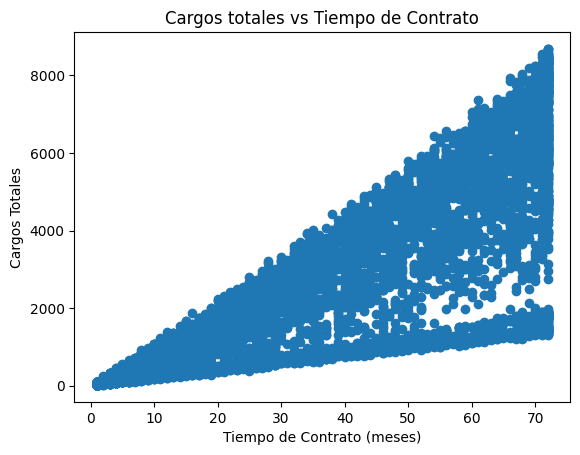

In [352]:
#Scatter plot Cargos totales versus Tiempo de contrato
import matplotlib.pyplot as plt

plt.scatter(datos_cod['remainder__tenure'], datos_cod['remainder__total_charges'])
plt.title('Cargos totales vs Tiempo de Contrato')
plt.xlabel('Tiempo de Contrato (meses)')
plt.ylabel('Cargos Totales');

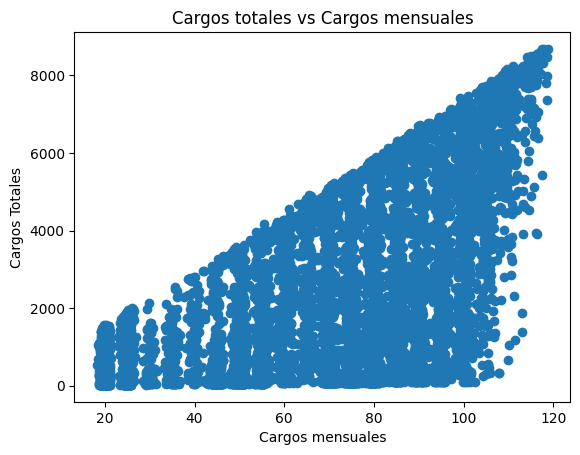

In [353]:
#Scatter plot Cargos totales versus Cargos mensuales
plt.scatter(datos_cod['remainder__monthly_charges'], datos_cod['remainder__total_charges'])
plt.title('Cargos totales vs Cargos mensuales')
plt.xlabel('Cargos mensuales')
plt.ylabel('Cargos Totales');

###Eliminando la variable Gasto total

##Modelado Predictivo

###Separación de datos

In [354]:
#Datos para Árbol de Decisiones
#Como ya había separado y balanceado "X" e "y", tengo que sacar de "X" la variable gasto total
X = X_balanceada.drop(['remainder__total_charges'], axis=1)
y = y_balanceada

In [355]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [356]:
#Normalizo "X" para usarla en KNN
X_norm = normalizacion.fit_transform(X)
X_train_norm = normalizacion.fit_transform(X_train)
X_test_norm = normalizacion.transform(X_test)

###Creación de modelos

In [357]:
#Modelo base
from sklearn.dummy import DummyClassifier

modelo_base = DummyClassifier(random_state=42)
modelo_base.fit(X_train, y_train)

DummyClassifier(random_state=42)

In [358]:
#Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(max_depth=5, random_state=42)
modelo_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [359]:
X_balanceada['remainder__monthly_charges'].max()

118.75

Para crear el modelo KNN debemos utilizar las variables normalizadas, ya que este modelo se basa en determinar la distancia de la variable respuesta con las variables explicativas, por lo que por ejemplo la variable balanceada de cargos mensuales que tiene un máximo de 118.75 podría pesar mucho más en el modelo que una variable categórica que tiene un máximo de 1.

In [360]:
#Modelo KNN
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train_norm,y_train)

KNeighborsClassifier()

###Evaluación de los Modelos

####Score para ver la generalización

In [361]:
#Modelo base
print(f'El score de entrenamiento para el modelo base es de: {modelo_base.score(X_train, y_train):.2f}\ny el score de prueba para el modelo base es de: {modelo_base.score(X_test, y_test):.2f}')

El score de entrenamiento para el modelo base es de: 0.50
y el score de prueba para el modelo base es de: 0.50


In [362]:
#Modelo Random Forest
print(f'El score de entrenamiento para el modelo Random Forest es de: {modelo_rf.score(X_train, y_train):.2f}\ny el score de prueba para el modelo Random Forest es de: {modelo_rf.score(X_test, y_test):.2f}')

El score de entrenamiento para el modelo Random Forest es de: 0.84
y el score de prueba para el modelo Random Forest es de: 0.83


In [363]:
#Modelo KNN
print(f'El score de entrenamiento para el modelo KNN es de : {modelo_knn.score(X_train_norm, y_train):.2f}\ny el score de prueba para el modelo KNN es de: {modelo_knn.score(X_test_norm, y_test):.2f}')

El score de entrenamiento para el modelo KNN es de : 0.84
y el score de prueba para el modelo KNN es de: 0.77


####Exactitud, Precisión, Recall, F1-score y Matriz de confusión

In [364]:
metricas = [accuracy_score, precision_score, recall_score, f1_score]
nombre_metrica = ['accuracy', 'precision', 'recall', 'f1']

In [365]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [366]:
#Modelo base
y_pred_base = modelo_base.predict(X_test)

for metrica, nombre in zip(metricas, nombre_metrica):
  if nombre in ['precision', 'f1']:
    valor_metrica = metrica(y_test, y_pred_base, zero_division=np.nan)
  else:
    valor_metrica = metrica(y_test, y_pred_base)
  print(f'La métrica "{nombre}" para el modelo base es: {valor_metrica:.2f}')

La métrica "accuracy" para el modelo base es: 0.50
La métrica "precision" para el modelo base es: nan
La métrica "recall" para el modelo base es: 0.00
La métrica "f1" para el modelo base es: 0.00


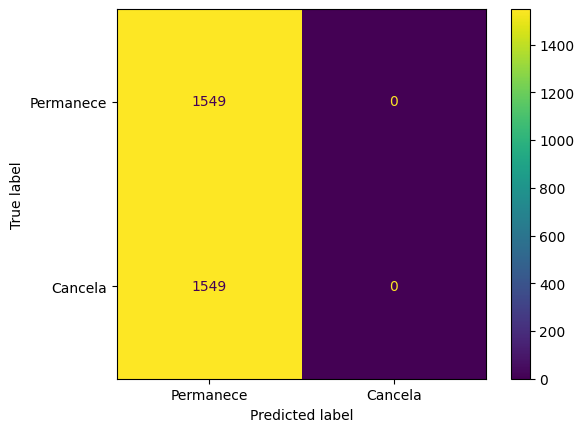

In [367]:
matriz_confusion_base = confusion_matrix(y_test, y_pred_base)
visualizacion_base = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_base, display_labels=['Permanece','Cancela'])
visualizacion_base.plot()

In [368]:
#Modelo Random Forest
y_pred_rf = modelo_rf.predict(X_test)

for metrica, nombre in zip(metricas, nombre_metrica):
  if nombre in ['precision', 'f1']:
    valor_metrica = metrica(y_test, y_pred_rf, zero_division=np.nan)
  else:
    valor_metrica = metrica(y_test, y_pred_rf)
  print(f'La métrica "{nombre}" para el modelo Random Forest es: {valor_metrica:.2f}')

La métrica "accuracy" para el modelo Random Forest es: 0.83
La métrica "precision" para el modelo Random Forest es: 0.79
La métrica "recall" para el modelo Random Forest es: 0.89
La métrica "f1" para el modelo Random Forest es: 0.84


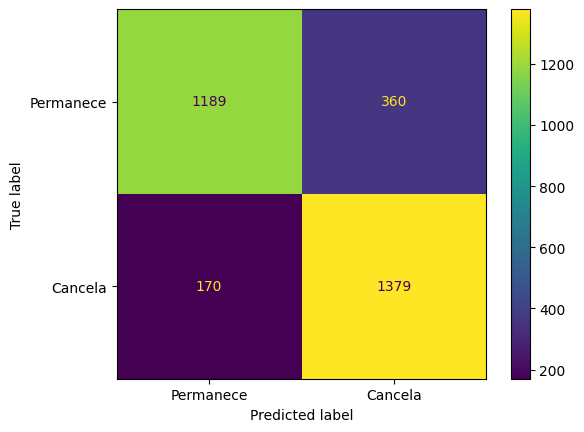

In [369]:
matriz_confusion_rf = confusion_matrix(y_test, y_pred_rf)
visualizacion_rf = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_rf, display_labels=['Permanece','Cancela'])
visualizacion_rf.plot()

In [370]:
#Modelo KNN
y_pred_knn = modelo_knn.predict(X_test_norm)

for metrica, nombre in zip(metricas, nombre_metrica):
  if nombre in ['precision', 'f1']:
    valor_metrica = metrica(y_test, y_pred_knn, zero_division=np.nan)
  else:
    valor_metrica = metrica(y_test, y_pred_knn)
  print(f'La métrica "{nombre}" para el modelo KNN es: {valor_metrica:.2f}')

La métrica "accuracy" para el modelo KNN es: 0.77
La métrica "precision" para el modelo KNN es: 0.72
La métrica "recall" para el modelo KNN es: 0.88
La métrica "f1" para el modelo KNN es: 0.79


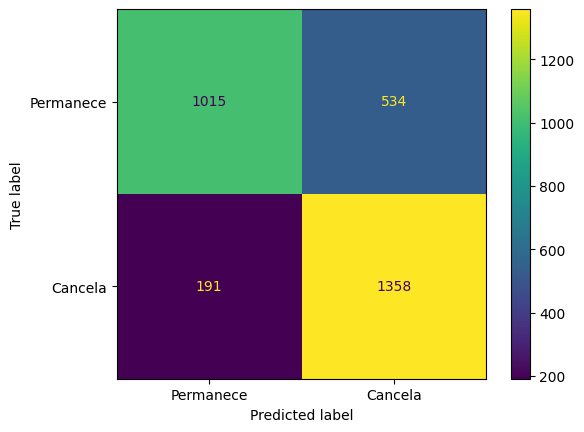

In [371]:
matriz_confusion_knn = confusion_matrix(y_test, y_pred_knn)
visualizacion_knn = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_knn, display_labels=['Permanece','Cancela'])
visualizacion_knn.plot()

El score del modelo Random Forest es parecido para los datos de entrenamiento (0.84) y de prueba (0.83). Sin embargo, para el modelo KNN hay mayor diferencia entre los datos de entrenamiento (0.85) y de prueba (0.77), lo que nos podría estar mostrando un sobreajuste a los datos de entrenamiento, por lo cual intentaremos mejorar el modelo aumentando los datos de entrenamiento.

In [372]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_norm2 = normalizacion.fit_transform(X_train2)
X_test_norm2 = normalizacion.transform(X_test2)

In [373]:
modelo_knn.fit(X_train_norm2,y_train2)

KNeighborsClassifier()

In [374]:
y_pred_knn2 = modelo_knn.predict(X_test_norm2)

for metrica, nombre in zip(metricas, nombre_metrica):
  if nombre in ['precision', 'f1']:
    valor_metrica = metrica(y_test2, y_pred_knn2, zero_division=np.nan)
  else:
    valor_metrica = metrica(y_test2, y_pred_knn2)
  print(f'La métrica "{nombre}" para el modelo KNN es: {valor_metrica:.2f}')

La métrica "accuracy" para el modelo KNN es: 0.78
La métrica "precision" para el modelo KNN es: 0.73
La métrica "recall" para el modelo KNN es: 0.89
La métrica "f1" para el modelo KNN es: 0.80


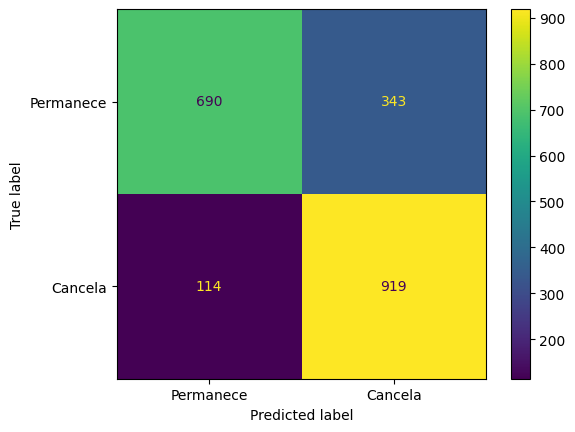

In [375]:
matriz_confusion_knn = confusion_matrix(y_test2, y_pred_knn2)
visualizacion_knn = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_knn, display_labels=['Permanece','Cancela'])
visualizacion_knn.plot()

Para el modelo, el parámetro más importante es Recall ya que estamos intentando evitar la clasificación incorrecta de aquellos clientes que abandonan la compañía como si se quedaran, porque lo que queremos es clasificar bien a aquellos que abandonan para intentar evitarlo.

Si bien mejoramos un poco el modelo y el Recall Además, al revisar la matriz de confusión podemos observar que disminuyó la cantidad de verdaderos positivos, es decir, disminuyó la predicción de aquellos cancelados correctamente clasificados.

Por eso es que seleccionamos el modelo de Random Forest e intentaremos mejorarlo haciendo ajuste de hiperparámetros.

In [377]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50,100,150],
              'max_depth' : [3,5,7]}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid= param_grid, cv=skf, scoring='recall')
model_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='recall')

In [378]:
model_grid.best_params_

{'max_depth': 5, 'n_estimators': 100}

Estos parámetros para el modelo RandomForest son los que ya hemos utilizado, ya que, por defecto n_estimators es 100 y ajustamos max_depth en 5, por lo que este es el mejor modelo que tenemos con un Recall de 0.89, la menor diferencia entre score de entrenamiento y prueba, y una mejor cantidad clientes que abandonan clasificados correctamente.

##Interpretación y conclusiones

###Análisis de la importancia de las Variables

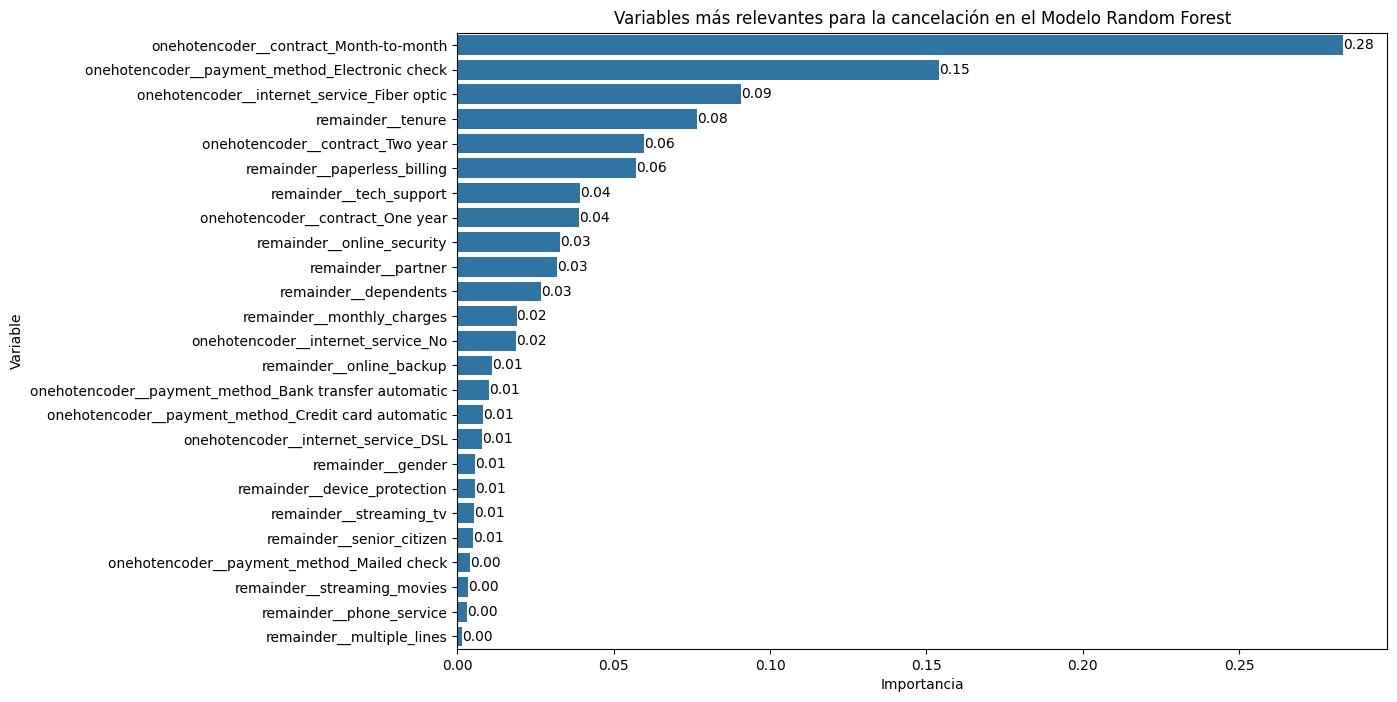

In [384]:
importancias = modelo_rf.feature_importances_
variables = X_train.columns

importancia_df = pd.DataFrame({'Variable': variables, 'Importancia': importancias})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Importancia', y='Variable', data=importancia_df, orient='h')
plt.title('Variables más relevantes para la cancelación en el Modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')

plt.show()

In [406]:
principales_explicativas = importancia_df.sort_values(by='Importancia', ascending=False).head(10)
suma_importancias = principales_explicativas['Importancia'].sum()
print(f'La suma de las 10 variables más importantes es de: {(suma_importancias*100):.2f}%')

La suma de las 10 variables más importantes es de: 86.43%


In [405]:
print(datos.groupby('contract')['Churn'].mean())

contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64


In [407]:
print(datos.groupby('payment_method')['Churn'].mean())

payment_method
Bank transfer automatic    0.167315
Credit card automatic      0.152531
Electronic check           0.452854
Mailed check               0.192020
Name: Churn, dtype: float64


In [408]:
print(datos.groupby('internet_service')['Churn'].mean())

internet_service
DSL            0.189983
Fiber optic    0.418928
No             0.074342
Name: Churn, dtype: float64


###Conclusión

##**Informe**

###**Preparación de los datos**
En este proyecto se utilizaron datos limpios extraídos de la primera parte del desafío Telecom X.

Se decidió eliminar dos columnas irrelevantes para el análisis:
*   ID de cliente: Este dato es para identificar al cliente, pero no aporta para el modelo predictivo, ya que no está asociado a la permanencia o abandono del cliente.
*   Gasto diario: Esta columna se eliminó ya que esta información fue creada a partir de los datos de gasto total y permanencia, por lo que la información es redundante y puede confundir al modelo.

Se realizó una codificación de variables categóricas con el fin de que los algoritmos puedan trabajar con ellas.

Al verificar la proporción entre clientes que abandonaron y clientes activos, pudimos observar que los primeros representan un 26.57% de la población, versus un 73.42% de clientes que permanecieron, por lo que se decidió hacer un balanceo mediante oversampling para equilibrarlos.

Adicionalmente, se realizó una normalización de los datos para poder utilizar el modelo bassado en distancia *K-Nearest Neighbors*(KNN).
###**Correlación y Selección de Variables**
Se realizó un análisis de correlación entre las variables numéricas presentes en los datos, donde pudimos observar una fuerte correlación positiva entre los cargos totales y el tiempo de permanencia, y también entre los cargos totales y los cargos mensuales. En el primer caso es evidente que mientras más tiempo está un cliente en la compañía, más dinero ha gastado en total.
Al tener una gran correlación entre cargos totales y tiempo de permanencia, ambos son candidatos a ser eliminados para evitar redundancias en el modelo, sin embargo, se decidió eliminar cargos totales, ya que además, tiene una correlación positiva con los cargos mensuales.

Porterirmente, pudimos observar gráficamente que aquellos clientes que permanecen en la compañía en su mayoría tienen un mayor tiempo de contrato y un mayor gasto total, lo que muestra gráficamente el comportamiento similar que tienen estas variables.
###**Modelo Predictivo**
Para crear los modelos en primer lugar se realizó la separación de los datos y se crearon dos sets de datos, uno para los modelos base y RandomForesr (X_train, X_test, y_train, y_test) que utiliza los datos balanceados y otro para el modelo KNN (X_norm, X_train_norm, X_test_norm) donde se normalizaron solamente las variables explicativas, ya que la variable respuesta estaba previamente normalizada.

A continuación se crearon los modelos previamente mencionados, un modelo DummyClassifier para tener una base, un modelo RandomForest con los datos balanceados y un modelo KNN con el fin de tener un modelo basado en distancia.

En primera instancia calculamos el score de los modelos RandomForest y lo comparamos con el KNN, en ambos casos con los datos de entrenamiento y de prueba. En esta evaluación nos dimos cuenta que el modelo KNN parecía tener un sonbreajuste a los datos de entrenamiento, ya que había una diferencia importante entre el score de entrenamiento(0.85) y de prueba (0.77), por lo que se realizó un nuevo modelado, aumentando en un 10% los datos de entrenamiento.

La evaluación de los modelos consistó en calcular las métricas de Exactitud, Precisión, Recall, F1-score y Matriz de confusión, poniendo énfasis en Recall ya que estamos intentando evitar la clasificación incorrecta de aquellos clientes que abandonan la compañía como si se quedaran, porque lo que queremos es clasificar bien a aquellos que abandonan para intentar evitarlo.

Si bien mejoramos un poco las métricas del modelo KNN (incluyendo Recall), al revisar la matriz de confusión observamos que disminuyó la cantidad de verdaderos positivos, es decir, disminuyó la predicción de aquellos cancelados correctamente clasificados.

Por lo anterior es que seleccionamos el modelo de Random Forest e intentaremos mejorarlo haciendo ajuste de hiperparámetros, evaluando  n_estimators y max_depth. Este análisis mostró que el modelo ya estaba utilizando los parámetros optimizados.

Con todo lo anterior, es que se descubrió que e**l mejor modelo para predecir los datos de abandono es el modelo RandomForest** con n_estimators=100 y max_depth=5.


###**Interpretación y conclusiones**
Si consideramos que el modelo seleccionado RandomForest calcula la importancia de las variables explicativas de acuerdo a su contribución para reducir las impurezas, entendiendo como impureza la mezcla entre los clientes que abandonan y los que permanecen, podemos interpretar y concluir lo siguiente:



1.   El modelo RandomForest fue seleccionado ya que tiene un Recall de 89%, una buena generalización y una mayor predicción de verdaderos positivos.
2.   Las 10 variables más importantes para el modelo RandomForest explican 86,43% de la capacidad predictiva del modelo.
3.   Cuando evaluamos las variables con mayor correlación con 'Churn' encontramos que las principales fueron:

*   "Month-to-month"
*   "Tenure"
*   "Fiber optic"
*   "Two year"
*   "Electronic check"

Cuando evaluamos las variables más importante para el modelo RandomForest encontramos que las principales fueron:

*   "Month-to-month"
*   "Electronic check"
*   "Fiber optic"
*   "Tenure"
*   "Two year"

Si bien las variables más importantes para el modelo solo nos explican cuáles son más relevantes para el poder predictivo, éstas coinciden con aquellas variables con mayor correlación con 'Churn'. A partir de esto es que agrupamos las variables iniciales (sin codificar) para analizar el tipo de contrato, método de pagp y servicio de internet. Al hacer este análisis pudimos entender que:


*   La variable "Month-to-month" es importante para el modelo ya que los clientes con contrato mes a mes tienen una tasa de cancelación del 42.70%, lo que es mayor a la tasa de cancelación de los otros tipos de contrato; un año (11.28%) y dos años (2.85%).
*   La variable "Electronic check" es importante para el modelo ya que los clientes que pagan con cheque electrónico tienen una tasa de cancelación del 45.29%, lo que es mayor a la tasa de cancelación de los otros tipos de pago; transferencia bancaria automática (16.73%), tarjeta de cédito automática (15.25%) y cheque enviado por correo (19.20%).
*   La variable "Fiber optic" es importante para el modelo ya que los clientes con fibra óptica tienen una tasa de cancelación del 41.89%, lo que es mayor a la tasa de cancelación de los otros tipos de servicio de internet; DSL (18.99%) y sin internet (7.43%).
*   La variable "Tenure" es importante para el modelo ya la mediana de aquellos clientes que permanecieron en la compañía es de 38 meses, lo que es superior incluso al 75% de los datos de aquellos clientes que se fueron que es de 29 meses.

4.   A partir del punto anterior podemos hacer las siguientes sugerencias:



*   Para retener a los clientes se recomienda crear una promoción en donde el costo mensual de mantener una cuenta por dos años sea menor que mantener una cuenta de un año, y a su vez el costo mensual de mantener una cuenta de un año sea menor que mantener una cuenta mensual. Esto con el fin de aumentar la fidelización de los clientes.
*   Realizar una encuesta con la cual poder identificar los problemas que tienen los clientes al pagar con cheque electrónico. Como alternativa, se puede ofrecer un descuento especial para aquellos clientes que cambien el método de pago.
*   Realizar una encuesta con la cual poder identificar los problemas que tienen los clientes con internet tipo Fibra óptica.
*   Ya que el 75% de los clientes que se fueron lo realizó a los 29 meses o menos, este problema lo podemos enfrentar con la misma promoción del primer punto. Por otro lado, debe hacerse un estudio de mercado de la competencia con el fin de proponer al cliente promociones de retención que al menos equiparen la oferta de otras compañías.






